Referred to the code for the Logistic Regression Model and https://www.youtube.com/watch?v=4ZhnXxfW8WQ for the NN.

# Load Data

In [ ]:
# Using: https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/1ZE-pwyXzALDYqeM0sJFQWCylmdQiFscb/view?usp=sharing' # The shareable 

In [ ]:
# Getting ID from link
fluff, part = link.split('d/')
id, fluff = part.split('/view')
print(id)

1ZE-pwyXzALDYqeM0sJFQWCylmdQiFscb


# Create Pandas Dataframe

In [ ]:
import pandas as pd

In [ ]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
df = pd.read_csv('Filename.csv')
# Dataset is now stored in a Pandas Dataframe

In [ ]:
# Checking that dataframe was loaded properly
df.head()

,age,hypertension,heart_disease,ever_married,ever_worked,private_job,avg_glucose_level,smokes,formerly_smoked,stroke
0,55,0,0,1,1,1,89.17,0,0,0
1,42,0,0,0,1,1,98.53,0,0,0
2,24,0,0,0,1,1,97.55,0,0,0
3,33,0,0,1,1,1,86.97,0,0,0
4,20,0,0,0,1,1,84.07,1,0,0


In [ ]:
# This will randomly shuffle the rows to make sure the data is not sorted.
df = df.sample(frac=1)
df.head()

,age,hypertension,heart_disease,ever_married,ever_worked,private_job,avg_glucose_level,smokes,formerly_smoked,stroke
1475,76,0,0,1,1,0,221.80,0,1,0
1309,37,0,0,0,1,1,89.11,0,0,0
182,45,1,0,1,1,1,93.21,0,0,0
2843,57,0,0,1,1,1,70.16,0,1,0
1422,53,0,0,1,1,1,88.38,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3425 entries, 3414 to 2273
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3425 non-null   int64  
 1   hypertension       3425 non-null   int64  
 2   heart_disease      3425 non-null   int64  
 3   ever_married       3425 non-null   int64  
 4   ever_worked        3425 non-null   int64  
 5   private_job        3425 non-null   int64  
 6   avg_glucose_level  3425 non-null   float64
 7   smokes             3425 non-null   int64  
 8   formerly_smoked    3425 non-null   int64  
 9   stroke             3425 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 294.3 KB


# Split Data into Training and Test Data Sets

In [ ]:
train_dataset, temp_test_dataset =  train_test_split(df, test_size=0.4)
test_dataset, valid_dataset =  train_test_split(temp_test_dataset, test_size=0.5)

In [ ]:
print("train_dataset:\t  ", train_dataset.shape)
print()
print("temp_test_dataset:", temp_test_dataset.shape)
print("test_dataset:\t  ", test_dataset.shape)
print("valid_dataset:\t  ", valid_dataset.shape)

train_dataset:	   (2055, 10)

temp_test_dataset: (1370, 10)
test_dataset:	   (685, 10)
valid_dataset:	   (685, 10)


In [ ]:
train_labels = train_dataset.pop('stroke')
test_labels = test_dataset.pop('stroke')
valid_labels = valid_dataset.pop('stroke')

In [ ]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_valid_dataset = norm(valid_dataset)

In [ ]:
print(r'Train/Test/Validate splits: ')
print(f'Train    : {normed_train_data.shape} ')
print(f'Test     : {normed_test_data.shape} ')
print(f'Validate : {normed_valid_dataset.shape} ')

print(r'Train/Test/Validate labels: ')
print(f'Train Labels : {train_labels.shape} ')
print(f'Test Labels  : {test_labels.shape} ')
print(f'Test Labels  : {valid_labels.shape} ')

Train/Test/Validate splits: 
Train    : (2055, 9) 
Test     : (685, 9) 
Validate : (685, 9) 
Train/Test/Validate labels: 
Train Labels : (2055,) 
Test Labels  : (685,) 
Test Labels  : (685,) 


In [ ]:
# show a sample of the data after normalized
normed_train_data.head(5)

,age,hypertension,heart_disease,ever_married,ever_worked,private_job,avg_glucose_level,smokes,formerly_smoked
858,-0.473560,-0.379657,-0.252257,-1.737831,0.069911,0.751560,-0.187552,-0.521836,-0.58264
1187,-0.577832,-0.379657,-0.252257,0.575150,0.069911,-1.329918,-0.659613,-0.521836,-0.58264
2002,0.412748,2.632677,-0.252257,0.575150,0.069911,-1.329918,-0.938423,1.915377,-0.58264
1821,0.099933,-0.379657,-0.252257,-1.737831,0.069911,0.751560,0.062739,-0.521836,1.71549
2163,1.194784,-0.379657,-0.252257,0.575150,0.069911,-1.329918,2.809548,-0.521836,-0.58264


# NN

In [ ]:
def build_model2_three_hidden_layers():
    model = Sequential()
    
    # Input Layer with 32 Neurons
    model.add(Dense(32, input_shape = (normed_train_data.shape[1],)))
    model.add(Dense(32,Activation('relu')))
    model.add(Dense(64, Activation('relu')))
    model.add(Dense(128, Activation('relu')))
    model.add(Dense(1)) 
    
    # Activation: sigmoid, softmax, tanh, relu, LeakyReLU. 
    #Optimizer: SGD, Adam, RMSProp, etc. # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
    learning_rate = 0.001
    optimizer = optimizers.SGD(learning_rate)
    model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
                optimizer=optimizer,
                metrics=['accuracy']) 
    return model


In [ ]:
model2 = build_model2_three_hidden_layers()
print('Here is a summary of this model: ')
model2.summary()

Here is a summary of this model: 
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 32)                320       
                                                                 
 dense_18 (Dense)            (None, 32)                1056      
                                                                 
 dense_19 (Dense)            (None, 64)                2112      
                                                                 
 dense_20 (Dense)            (None, 128)               8320      
                                                                 
 dense_21 (Dense)            (None, 1)                 129       
                                                                 
Total params: 11,937
Trainable params: 11,937
Non-trainable params: 0
_________________________________________________________________


# Train

In [ ]:
def build_model1_two_hidden_layers():
    model = Sequential()
    model.add(Dense(32, input_shape = (normed_train_data.shape[1],)))
    model.add(Dense(1))                         

    # Activation: sigmoid, softmax, tanh, relu, LeakyReLU. 
    #Optimizer: SGD, Adam, RMSProp, etc. # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
    learning_rate = 0.0001
    optimizer = optimizers.SGD(learning_rate)
    model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer = optimizer,
                metrics=['accuracy']) # for regression problems, mean squared error (MSE) is often employed
    return model


In [ ]:
# EPOCHS = 100
# batch_size = 16 # 6 iteration

EPOCHS = 50
batch_size = 4 # 6 iteration

model = build_model1_two_hidden_layers()
print('Here is a summary of this model: ')
model.summary()


with tf.device('/CPU:0'): # it can be with '/CPU:0'
# with tf.device('/GPU:0'): # comment the previous line and uncomment this line to train with a GPU, if available.
    history = model.fit(
        normed_train_data, 
        train_labels,
        batch_size = batch_size,
        epochs=EPOCHS, 
        verbose=1,
        shuffle=True,
        steps_per_epoch = int(normed_train_data.shape[0] / batch_size) ,
        validation_data = (normed_valid_dataset, valid_labels),   
    )

Here is a summary of this model: 
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 32)                320       
                                                                 
 dense_23 (Dense)            (None, 1)                 33        
                                                                 
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
513/513 [==============================] - 2s 2ms/step - loss: 0.7837 - accuracy: 0.6910 - val_loss: 0.7469 - val_accuracy: 0.7124
Epoch 2/50
513/513 [==============================] - 1s 2ms/step - loss: 0.7437 - accuracy: 0.7094 - val_loss: 0.7097 - val_accuracy: 0.7372
Epoch 3/50
513/513 [==============================] - 1s 2ms/step - loss: 0.7087 - accuracy: 0.7294 - val_loss: 0.6753 - val_accuracy:

In [ ]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


Summary of the results after each epoch: 


,loss,accuracy,val_loss,val_accuracy,epoch
45,0.252684,0.940517,0.230231,0.954745,45
46,0.245120,0.943442,0.227857,0.954745,46
47,0.245934,0.942955,0.225557,0.954745,47
48,0.237229,0.945880,0.223358,0.954745,48
49,0.236435,0.945392,0.221234,0.954745,49


# Loss/Accuracy

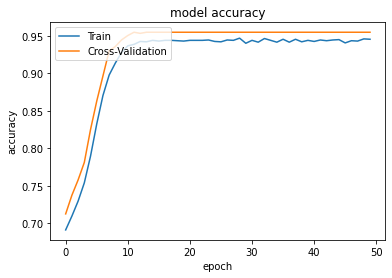

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

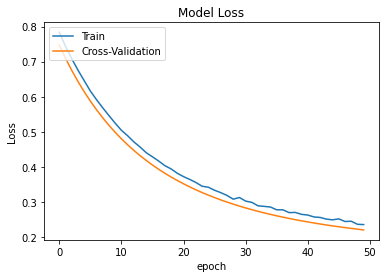

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

In [ ]:
print('Train Split: ')
loss, accuracy = model.evaluate(normed_train_data, train_labels, verbose=1)

print("Accuracy   : {:5.2f} ".format(accuracy))

Train Split: 
65/65 [==============================] - 0s 2ms/step - loss: 0.2382 - accuracy: 0.9436
Accuracy   :  0.94 


In [ ]:

print('Evaluation Split: ')
loss, accuracy =  model.evaluate(normed_valid_dataset, valid_labels, verbose=2)

print("Accuracy   : {:5.2f} ".format(accuracy))

Evaluation Split: 
22/22 - 0s - loss: 0.2212 - accuracy: 0.9547 - 41ms/epoch - 2ms/step
Accuracy   :  0.95 


In [ ]:
print('Test Split: ')
loss, accuracy =  model.evaluate(normed_test_data, test_labels, verbose=2)

print("Accuracy   : {:5.2f} ".format(accuracy))

Test Split: 
22/22 - 0s - loss: 0.2288 - accuracy: 0.9518 - 42ms/epoch - 2ms/step
Accuracy   :  0.95 


22/22 [==============================] - 0s 1ms/step


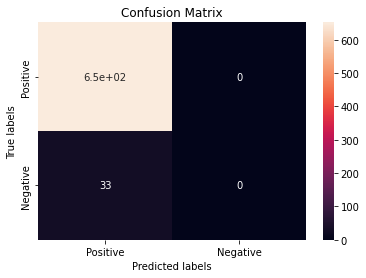

In [ ]:
from sklearn.metrics import confusion_matrix


ax= plt.subplot()
predict_results = model.predict(normed_test_data)

predict_results = (predict_results > 0.5)

cm = confusion_matrix(test_labels, predict_results)

sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative']);

